# Gradient decent
### Carl Fredrik Berg, NTNU, 2023

## Introduction

In this note we will discuss optimization of a function when we know both the function and its gradient. For this we will consider the <i>gradient decent</i> method (aka. steepest descent).

Let $F \colon \mathbb{R}^n \to \mathbb{R}$ be a multi-variable real-valued function. The main idea of the gradient descent method is to search for a minimum (or maximum) of $F(\vec{x})$ in the opposite (or along the) direction the gradient is pointing. Remember that the gradient points in the direction of sharpest increase of the function $F$. By following the direction of decrease, a smaller value of $F$ can be found.

The gradient descent method is usually attributed to the French mathematician Augustin-Louis Cauchy.



## Gradient decent

Let $F \colon \mathbb{R}^n \to \mathbb{R}$ be a multi-variable real-valued function such that $\frac{\partial F}{\partial x_i}$ exist for all $i \in \{1,2,\dots,n\}$. Remember that the gradient of $F$ is 
$$\nabla F(\vec{x}) = \left[ \frac{\partial F(\vec{x})}{\partial x_1}, \frac{\partial F(\vec{x})}{\partial x_2}, \frac{\partial F(\vec{x})}{\partial x_3}, \dots, \frac{\partial F(\vec{x})}{\partial x_n} \right]^T$$

Let $\vec{x}_0 \in \mathbb{R}^n$ be our starting location. For each iteration $i$ we will consider the negative gradient of $F$ at $\vec{x}_i$, i.e., $- \nabla F(\vec{x}_i)$. The function $F$ will decrease fastest in the direction $ - \nabla F(\vec{x}_i)$, thus the common alternative name steepest decent. If we then take
$$\vec{x}_{i+1} = \vec{x}_i - \gamma_i \nabla F(\vec{x}_i)$$
we know that $F(\vec{x}_i) \geq F(\vec{x}_{i+1})$ if we take the step length $\gamma_i$ small enough. Thus for an intelligent choice of $\gamma_i$ values, we get a sequence $\vec{x}_0, \vec{x}_1, \vec{x}_2, \dots$ such that $F(\vec{x}_0) \geq F(\vec{x}_1) \geq F\vec{x}_2) \geq \dots$, thus the sequence $\{ \vec{x}_i \}$ should converge towards a local minimum.

The step length $\gamma_i$ can be chosen by different methods. Consider
$$\begin{equation}
F(\vec{x}_i - \gamma_i \nabla F(\vec{x}_i))
\end{equation}$$
as a one-dimensional function with respect to the variable $\gamma_i$. Then one could do a minimization of this one-dimensional function, i.e., doing a line search. This can be done by several methods, including the bracket methods we have considered earlier. Note that if we ask for the exact minimum of this one-dimensional function, one such method will be the conjugate gradient method.

We will first test the method by just using a random small step size.

### Example for single variable function

We will first consider a simple example, namely the function $f(x) = x^3 - 2x$. This function always have a derivative, namely $f'(x) = 3x^2 - 2$. The extrema will be given by the points where the derivative is zero. Thus 
$$\begin{align}
f'(x) &= 0 \\
3x^2 - 2 &= 0 \\
x^2 &= \frac{2}{3} \\
x &= \pm \sqrt{\frac{2}{3}}
\end{align}$$

We will now try to use the gradient decent method to find the minimum value of the function. This is done in the python script below.

In [15]:
import numpy as np

def func(x):
    return x**3 - 2*x

def grad(x):
    return 3*x**2 -2


#Maximum number of iterations
n = 20

#Error tolerance
eps = 1e-4

#Storing values for plotting
xx=np.zeros(n)

xx[0]=-0.5 # Starting point for you iterative solution
diff=2*eps

gamma=0.2

ii=0
while(ii<(n-1) and diff>eps):
    xx[ii+1]=xx[ii]-gamma*grad(xx[ii])# Using gradient
#    xx[ii+1]=xx[ii]-gamma*(grad(xx[ii])/np.abs(grad(xx[ii]))) #Using direction
    print(xx[ii+1])
    diff=np.abs(xx[ii+1]-xx[ii])# If you use the gradient, your step length will change
#    diff=np.abs(func(xx[ii+1])-func(xx[ii]))# When using the direction, the step length is constant, and you have to use the difference in function values
    ii+=1
    
print('Number of steps: ',ii)
print('Solution: ',xx[ii])
print('Exact solution: ',np.sqrt(2/3),func(np.sqrt(2/3)))


-0.25
0.11250000000000004
0.5049062500000001
0.7519480572265625
0.8126925287664815
0.8164110409787665
0.8164948482795467
Number of steps:  7
Solution:  0.8164948482795467
Exact solution:  0.816496580927726 -1.0886621079036347


### Example for multi-variable function

In this example we will consider the Himmelblau's function $F(x,y) = \left(x^2 + y - 11 \right)^2 + \left(x + y^2 - 7 \right)^2$, and try to find the minimum by using the steepest decent with a constant pre-factor $\gamma$ for the step size.

We find the negative gradient as
$$\begin{align}
- \nabla F &= - \left( \frac{\partial F}{\partial x} , \frac{\partial F}{\partial y} \right) \\
&= - \left( 4 x\left(x^2 + y - 11 \right) + 2\left(x + y^2 - 7 \right)  , 2 \left(x^2 + y - 11 \right) + 4 y \left(x + y^2 - 7 \right) \right)
\end{align}$$

Then we find
$$\vec{x}_{i+1} = \vec{x}_i - \gamma \nabla F(\vec{x}_i)$$
for a constant small value of $\gamma$. This is implemented in python below.

Number of steps:  408


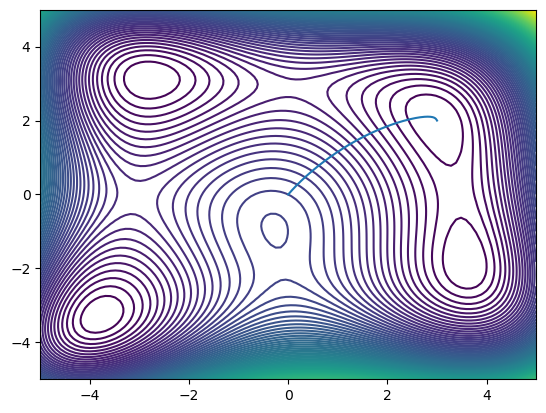

In [7]:
#This first part is only included as a way of obtaining the gradient. You could just use the derivatives above.
import sympy as sym
x, y = sym.symbols('x y')
xd=sym.diff((x**2+y-11)**2+(x+y**2-7)**2,x)
yd=sym.diff((x**2+y-11)**2+(x+y**2-7)**2,y)
#print(xd)
#print(yd)

import numpy as np
import matplotlib.pyplot as plt

def Func(x,y):
    return (x**2+y-11)**2+(x+y**2-7)**2

def Grad(x,y):
    return np.array([(4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14),(2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22)])

#Max number of steps
nn=1000
#Saving the intermediate steps to be able to plot the path.
xvec=np.zeros((nn,2))
#The initial point
xvec[0,:]=[0,0]

#Constant for step length
gamma=0.001
#Convergence criteria
eps=1E-6
diff=2*eps
ii=0
while ii<nn and diff>eps:
    ii+=1
    xvec[ii,:]=xvec[ii-1,:]-gamma*Grad(xvec[ii-1,0],xvec[ii-1,1])
    diff=np.sqrt(np.sum((xvec[ii,:]-xvec[ii-1,:])**2))
    
print("Number of steps: ",ii)

x = np.linspace(-5, 5, 100)
y = np.copy(x)

xv, yv = np.meshgrid(x, y)

xr=np.ravel(xv)
yr=np.ravel(yv)

z=[]
for jj in range(0,len(xr)):
    z.append(Func(xr[jj],yr[jj]))
zr=np.asarray(z)
zv=zr.reshape(xv.shape)

fig = plt.figure()
plt.contour(xv,yv,zv,100)
plt.plot(xvec[:ii,0],xvec[:ii,1])
plt.show()


## Newton's method

<i>Newton's method</i> (aka. Newton–Raphson method) is a numerical method to find the root of a function. The method is using the derivative of the function. 

The main idea is to use the tangent line as an approximation of the function, and then find the root of this approximate function. The approximate root of the tangent is expected to bring one iteratively closer to the root of the function.

The method works for multi-dimensional functions, however, as we will only need a special version of it later, we will restrict ourselves to only considering a real-valued function. The extension to multi-dimensional functions is straight forward.

Let $f \colon \mathbb{R} \to \mathbb{R}$ be a real-valued function with derivative $f'$, and let $x_0$ be an initial guess. For our iterative procedure, assume we are at point $x_i$ after $i$ iterations. Then we approximate the function $f$ by the linear function $f(x_i)+(x-x_i) f'(x_i)$, which gives the tangent of $f$ in point $x_i$. If we take the root of this linear function as $x_{i+1}$, we get
$$\begin{align}
f(x_i)+(x_{i+1}-x_i) f'(x_i) &= 0 \\
x_{i+1}  &= x_i - \frac{f(x_i)}{f'(x_i)} 
\end{align}$$

Iterating we are expected to get close to the root of $f$.


#### Example

Let us consider the simple example $f(x) = x(x^2-2) = x^3-2x$. We immediately see that the roots are $x = \pm \sqrt{2}$ and $x = 0$. Let us try to solve this using a python script.

Number of steps:  6
Solution:  1.4142135623735754
Exact solution:  0 1.4142135623730951
[1.         2.         1.6        1.44225352 1.41501064 1.41421424
 1.41421356 0.         0.         0.        ]


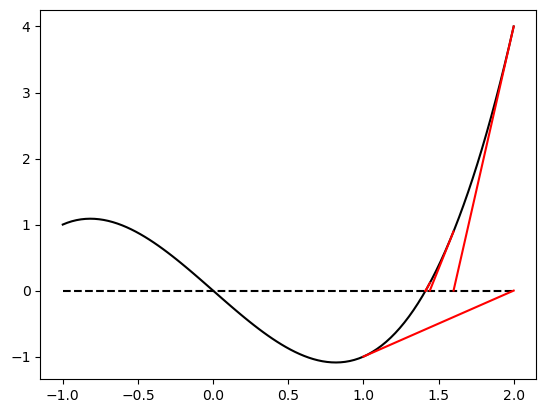

In [13]:
def func(x):
    return x**3 - 2*x

def grad(x):
    return 3*x**2 -2


#Create an intervall x to plot f(x)
xi = np.linspace(-1,2,100)

#Maximum number of iterations
n = 10
nn = np.linspace(0,n,n)

#Error tolerance
eps = 1e-4

#Storing values for plotting
xx=np.zeros(n)

xx[0]=1.0
diff=2*eps
fig = plt.figure()
plt.plot(xi,func(xi),color='k')
plt.plot((-1,2),(0,0),color='k',linestyle='dashed')

ii=0
while(ii<(n-1) and diff>eps):
    xx[ii+1]=xx[ii]-func(xx[ii])/grad(xx[ii])
    plt.plot((xx[ii],xx[ii+1]),(func(xx[ii]),0),color='r')
    diff=np.abs(xx[ii+1]-xx[ii])
    ii+=1
    
print('Number of steps: ',ii)
print('Solution: ',xx[ii])
print('Exact solution: ',0,np.sqrt(2))
print(xx)

plt.show()


### Newton's method in optimization

As described above, Newton's method is a numerical method to find the roots of a function, i.e., points $x$ where $f(x) = 0$.

To find the extrema of a function, we want to find points where $f'(x)=0$. If the function $f$ is twice differentiable, we can use Newton's method to the derivative $f'$ to find the roots of $f'$, i.e., the points where $f'(x) = 0$. Note that this gives you an optima, irrespective of being a minimum or a maximum.

Applying Newton's method to $f'$, we have the following iterative algorithm:

$$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}$$

#### Example

We will continue the example above, with the function $f(x) = x(x^2-2) = x^3-2x$. Then the derivative is $f'(x) = 3x^2-2$, which will give extrema at 
$$x = \pm \sqrt{\frac{2}{3}}$$

This is implemented in the python code below. Note that we now ends up with the maximum point, while the gradient descent steered us towards the minimum.

Number of steps:  4
Solution:  -0.8164965811310427
Exact solution:  0.816496580927726
[-0.5        -0.91666667 -0.8219697  -0.8165148  -0.81649658  0.
  0.          0.          0.          0.        ]


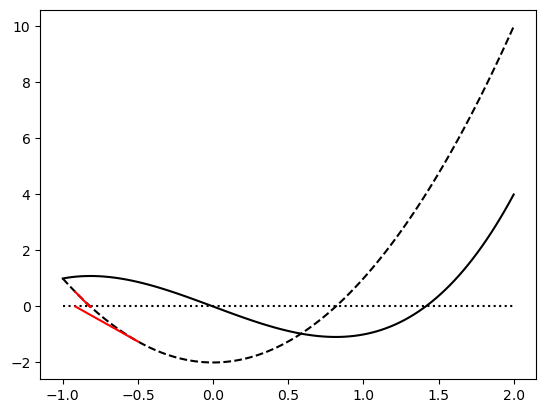

In [16]:
def grad2(x):
    return 6*x

#Maximum number of iterations
n = 10
nn = np.linspace(0,n,n)

#Error tolerance
eps = 1e-4

#Storing values for plotting
xx=np.zeros(n)

xx[0]=-0.5
diff=2*eps
fig = plt.figure()
plt.plot(xi,func(xi),color='k')
plt.plot(xi,grad(xi),color='k',linestyle='dashed')
plt.plot((-1,2),(0,0),color='k',linestyle='dotted')


ii=0
while(ii<(n-1) and diff>eps):
    xx[ii+1]=xx[ii]-grad(xx[ii])/grad2(xx[ii])
    plt.plot((xx[ii],xx[ii+1]),(grad(xx[ii]),0),color='r')
    diff=np.abs(xx[ii+1]-xx[ii])
    ii+=1
    
print('Number of steps: ',ii)
print('Solution: ',xx[ii])
print('Exact solution: ',np.sqrt(2/3))
print(xx)

plt.show()



## Newton's method in higher dimensions

We now want to apply the Newton's method in higher dimensions. Let $F \colon \mathbb{R}^n \to \mathbb{R}$ be a multi-variable real-valued function such that $\frac{\partial F}{\partial x_i}$ and $\frac{\partial^2 F}{\partial x_i \partial x_j}$ exist for all $i,j \in \{1,2,\dots,n\}$. Remember that the gradient of $F$ is 
$$\nabla F(\vec{x}) = \left[ \frac{\partial F(\vec{x})}{\partial x_1}, \frac{\partial F(\vec{x})}{\partial x_2}, \frac{\partial F(\vec{x})}{\partial x_3}, \dots, \frac{\partial F(\vec{x})}{\partial x_n} \right]^T$$

The Taylor expansion of the function $F$ can be written as
$$F(\vec{x} + \Delta \vec{x}) \simeq F(\vec{x}) + \nabla F(\vec{x})^T\Delta \vec{x} + \frac{1}{2} \Delta \vec{x}^T \mathbf{H}_F(\vec{x}) \Delta \vec{x}$$
where $\mathbf{H}$ is the Hessian matrix defined as
$$\mathbf{H}_F(x) =
\begin{bmatrix}
\frac{\partial^2 F(\vec{x})}{\partial x_1^2} & \frac{\partial^2 F(\vec{x})}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 F(\vec{x})}{\partial x_1 \partial x_n}  \\
\frac{\partial^2 F(\vec{x})}{\partial x_2 \partial x_1} & \frac{\partial^2 F(\vec{x})}{\partial x_2^2} & \cdots & \frac{\partial^2 F(\vec{x})}{\partial x_2 \partial x_n}  \\
\vdots & \vdots & & \vdots \\
\frac{\partial^2 F(\vec{x})}{\partial x_n \partial x_1} & \frac{\partial^2 F(\vec{x})}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 F(\vec{x})}{\partial x_n^2} 
\end{bmatrix}
$$
The Hessian matrix of $F$ is the Jacobian matrix of the gradient of the function $F$, i.e., $\mathbf{H}_F = \mathbf{J}(\nabla F(\vec{x}))$.

The iterative procedure is then similar to what we had before, just using the multi-variable versions of the derivative and second order derivative, i.e., the gradient and the Hessian matrix:

$$\vec{x}_{i+1} = \vec{x}_i - \nabla F(\vec{x}_i) \mathbf{H}_F^{-1}(\vec{x}_i)$$

Note that this method involves a matrix inversion.

It is also common to add a variable $\gamma$ to control the step size, as:

$$\vec{x}_{i+1} = \vec{x}_i - \gamma \nabla F(\vec{x}_i) \mathbf{H}_F^{-1}(\vec{x}_i)$$

An example use is shown in the python code below.


Number of steps:  5


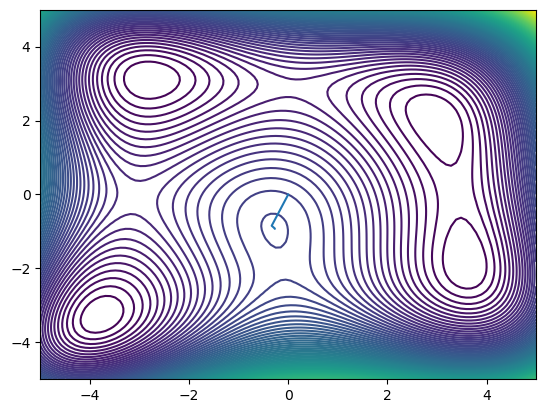

In [17]:
#This first part is only included as a way of obtaining the Hessian.
import sympy as sym
x, y = sym.symbols('x y')

xdd=sym.diff((x**2+y-11)**2+(x+y**2-7)**2,x,x)
xdyd=sym.diff((x**2+y-11)**2+(x+y**2-7)**2,x,y)
ydxd=sym.diff((x**2+y-11)**2+(x+y**2-7)**2,y,x)
ydd=sym.diff((x**2+y-11)**2+(x+y**2-7)**2,y,y)

#print(xdd)
#print(xdyd)
#print(ydxd)
#print(ydd)

def Hessian(x,y):
    return np.array([[2*(6*x**2 + 2*y - 21),4*(x + y)],[4*(x + y),2*(2*x + 6*y**2 - 13)]])

#Max number of steps
nn=1000
#Saving the intermediate steps to be able to plot the path.
xvec=np.zeros((nn,2))
#The initial point
xvec[0,:]=[0,0]

#Constant for step length
gamma=1.0
#Convergence criteria
eps=1E-6
diff=2*eps
ii=0
while ii<nn and diff>eps:
    ii+=1
    invHessian=np.linalg.inv(Hessian(xvec[ii-1,0],xvec[ii-1,1]))
    xvec[ii,:]=xvec[ii-1,:]-gamma*np.matmul(Grad(xvec[ii-1,0],xvec[ii-1,1]),invHessian)
    diff=np.sqrt(np.sum((xvec[ii,:]-xvec[ii-1,:])**2))

    
print("Number of steps: ",ii)

fig = plt.figure()
plt.contour(xv,yv,zv,100)
plt.plot(xvec[:ii,0],xvec[:ii,1])
plt.show()
